In [1]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

sns.set_theme(style='ticks')

c:\Users\user\Desktop\Python_Learning\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Loading Data

dataset = load_dataset('lukebarousse/data_jobs') 
df = dataset['train'].to_pandas()

In [17]:
#cleaning the dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) #convert to datetime
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) #skills column is a strings of list. so converting to a list 

In [18]:
df_DA_USA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()  #analysing only Data Analyst jobs in the  USA


In [19]:
df_DA_USA['job_month'] = df_DA_USA['job_posted_date'].dt.strftime('%b') #add a month column

In [20]:
df_DA_USA_exploded = df_DA_USA.explode('job_skills')  #exploding the skills column to see better each skills

In [84]:
df_DA_USA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55720 entries, 36 to 785685
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        55720 non-null  object        
 1   job_title              55720 non-null  object        
 2   job_location           55341 non-null  object        
 3   job_via                55678 non-null  object        
 4   job_schedule_type      55042 non-null  object        
 5   job_work_from_home     55720 non-null  bool          
 6   search_location        55720 non-null  object        
 7   job_posted_date        55720 non-null  datetime64[ns]
 8   job_no_degree_mention  55720 non-null  bool          
 9   job_health_insurance   55720 non-null  bool          
 10  job_country            55720 non-null  object        
 11  salary_rate            8230 non-null   object        
 12  salary_year_avg        4732 non-null   float64       
 13  sala

In [21]:
df_DA_USA_pivoted = pd.pivot_table(df_DA_USA_exploded, index= 'job_month', columns= 'job_skills', aggfunc= 'size', fill_value= 0)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_DA_USA_pivoted = df_DA_USA_pivoted.reindex(months)
df_DA_USA_pivoted

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,asp.net core,...,watson,webex,windows,wire,word,workfront,wrike,xamarin,yarn,zoom
job_month,,,,,,,,,,,,,,,,,,,,,
Jan,39,7,206,21,7,1,0,15,17,0,...,7,9,80,3,968,0,7,0,0,30
Feb,35,0,203,23,4,1,0,14,9,0,...,6,6,92,3,738,3,0,0,0,19
Mar,39,1,219,5,5,6,1,14,11,0,...,7,6,76,5,736,1,1,1,0,16
Apr,28,1,208,8,3,7,3,5,6,0,...,2,4,86,9,695,8,1,0,0,12
May,27,3,144,15,8,9,1,5,13,0,...,1,6,67,1,557,3,0,0,0,9
Jun,39,5,188,9,4,8,3,7,7,0,...,5,2,69,8,721,5,0,0,0,20
Jul,42,2,160,5,3,5,5,6,2,0,...,4,1,59,10,587,0,0,0,1,13
Aug,44,2,187,5,3,10,0,5,3,0,...,3,6,87,4,752,0,0,0,0,26
Sep,22,3,145,11,2,3,4,4,3,0,...,0,4,80,4,478,0,0,0,1,12


In [22]:
#create a new row called total to see the sum of each skill
df_DA_USA_pivoted.loc['Total'] = df_DA_USA_pivoted.sum()
df_DA_USA_pivoted

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,asp.net core,...,watson,webex,windows,wire,word,workfront,wrike,xamarin,yarn,zoom
job_month,,,,,,,,,,,,,,,,,,,,,
Jan,39,7,206,21,7,1,0,15,17,0,...,7,9,80,3,968,0,7,0,0,30
Feb,35,0,203,23,4,1,0,14,9,0,...,6,6,92,3,738,3,0,0,0,19
Mar,39,1,219,5,5,6,1,14,11,0,...,7,6,76,5,736,1,1,1,0,16
Apr,28,1,208,8,3,7,3,5,6,0,...,2,4,86,9,695,8,1,0,0,12
May,27,3,144,15,8,9,1,5,13,0,...,1,6,67,1,557,3,0,0,0,9
Jun,39,5,188,9,4,8,3,7,7,0,...,5,2,69,8,721,5,0,0,0,20
Jul,42,2,160,5,3,5,5,6,2,0,...,4,1,59,10,587,0,0,0,1,13
Aug,44,2,187,5,3,10,0,5,3,0,...,3,6,87,4,752,0,0,0,0,26
Sep,22,3,145,11,2,3,4,4,3,0,...,0,4,80,4,478,0,0,0,1,12


In [23]:
df_DA_USA_pivoted = df_DA_USA_pivoted[df_DA_USA_pivoted.loc['Total'].sort_values(ascending= False).index]   #sort descending using the total row
df_DA_USA_pivoted = df_DA_USA_pivoted.drop('Total')  #drop the total row
df_DA_USA_pivoted

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,capacitor,chainer,asp.net core,qt,microsoft lists,msaccess,kotlin,openstack,theano,xamarin
job_month,,,,,,,,,,,,,,,,,,,,,
Jan,4601,3592,2488,2254,1832,1513,1337,968,972,718,...,1,0,0,0,0,0,0,0,0,0
Feb,3168,2587,1676,1618,1212,1045,1122,738,705,514,...,0,0,0,0,0,0,0,0,0,0
Mar,3226,2661,1804,1683,1238,1141,1054,736,669,418,...,0,0,0,0,0,0,0,0,0,1
Apr,3220,2549,1789,1679,1302,1038,1057,695,650,439,...,0,0,0,0,0,0,0,0,0,0
May,2581,2118,1432,1349,972,867,860,557,515,358,...,0,0,0,0,0,1,0,0,0,0
Jun,2862,2382,1628,1609,984,1017,989,721,624,414,...,0,0,0,1,0,0,1,1,0,0
Jul,2609,2118,1533,1438,996,881,881,587,549,401,...,0,0,0,0,0,0,0,0,0,0
Aug,3414,2731,1951,2025,1276,1271,1208,752,746,484,...,0,0,0,0,0,0,0,0,0,0
Sep,2295,1801,1353,1229,856,746,820,478,475,359,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
"""df_a = df_DA_USA_pivoted.copy()
df_a['Total'] = df_a.sum(axis= 1)"""

In [24]:
DA_USA_totals = df_DA_USA.groupby('job_month').size()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
DA_USA_totals = DA_USA_totals.reindex(months)
DA_USA_totals

job_month
Jan    8494
Feb    6124
Mar    6218
Apr    6049
May    4993
Jun    5683
Jul    5201
Aug    6634
Sep    4639
Oct    5271
Nov    4531
Dec    3979
dtype: int64

pd.df.div() method

The pd.DataFrame.div() method in pandas is used for element-wise division of a DataFrame by another DataFrame, Series, or scalar (single value).

Syntax:
DataFrame.div(other, axis='columns', level=None, fill_value=None)
Arguments:
other → The value to divide by (can be a DataFrame, Series, or scalar).

axis → Determines the direction of division:

0 (or "index") → Divide each row by the corresponding value in other.

1 (or "columns") → Divide each column by the corresponding value in other (default).

level → Used when dividing DataFrames with MultiIndex.

fill_value → Fills missing values before performing division to avoid NaN results.

In [25]:
#to get percentage
df_DA_USA_percent = df_DA_USA_pivoted.div(DA_USA_totals/100, axis= 0)
df_DA_USA_percent

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,capacitor,chainer,asp.net core,qt,microsoft lists,msaccess,kotlin,openstack,theano,xamarin
job_month,,,,,,,,,,,,,,,,,,,,,
Jan,54.167648,42.288674,29.291264,26.536379,21.568166,17.812574,15.740523,11.396280,11.443372,8.453026,...,0.011773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,51.730895,42.243632,27.367734,26.420640,19.790986,17.064010,18.321359,12.050947,11.512084,8.393207,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,51.881634,42.795111,29.012544,27.066581,19.909939,18.349952,16.950788,11.836603,10.759087,6.722419,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016082
Apr,53.231939,42.139197,29.575136,27.756654,21.524219,17.159861,17.473963,11.489502,10.745578,7.257398,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,51.692369,42.419387,28.680152,27.017825,19.467254,17.364310,17.224114,11.155618,10.314440,7.170038,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.020028,0.000000,0.000000,0.000000,0.000000
Jun,50.360725,41.914482,28.646841,28.312511,17.314799,17.895478,17.402780,12.686961,10.980116,7.284885,...,0.000000,0.000000,0.000000,0.017596,0.000000,0.000000,0.017596,0.017596,0.000000,0.000000
Jul,50.163430,40.722938,29.475101,27.648529,19.150163,16.939050,16.939050,11.286291,10.555662,7.710056,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,51.462165,41.166717,29.409105,30.524570,19.234248,19.158879,18.209225,11.335544,11.245101,7.295749,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,49.471869,38.823022,29.165768,26.492779,18.452253,16.081052,17.676223,10.303945,10.239276,7.738737,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [26]:
df_plot = df_DA_USA_percent.iloc[:,:5]
df_plot

job_skills,sql,excel,tableau,python,sas
job_month,,,,,
Jan,54.167648,42.288674,29.291264,26.536379,21.568166
Feb,51.730895,42.243632,27.367734,26.420640,19.790986
Mar,51.881634,42.795111,29.012544,27.066581,19.909939
Apr,53.231939,42.139197,29.575136,27.756654,21.524219
May,51.692369,42.419387,28.680152,27.017825,19.467254
Jun,50.360725,41.914482,28.646841,28.312511,17.314799
Jul,50.163430,40.722938,29.475101,27.648529,19.150163
Aug,51.462165,41.166717,29.409105,30.524570,19.234248
Sep,49.471869,38.823022,29.165768,26.492779,18.452253


In [32]:
df_plot.columns == 'tableau'

array([False, False,  True, False, False])

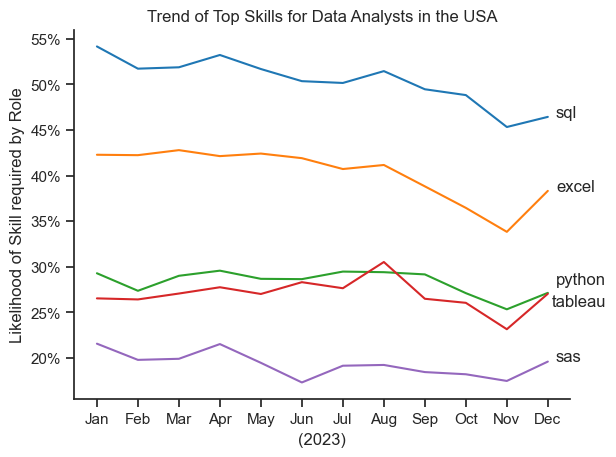

In [43]:
#plot
from matplotlib.ticker import PercentFormatter  
sns.lineplot(data= df_plot, dashes= False, palette= 'tab10', legend= False)
plt.title('Trend of Top Skills for Data Analysts in the USA')
plt.xlabel('(2023)')
plt.ylabel('Likelihood of Skill required by Role')
ax= plt.gca()
#ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"{int(y)}%"))
ax.yaxis.set_major_formatter(PercentFormatter(decimals= 0))
sns.despine()
# Adjusting text labels to prevent overlapping between tableau and python text
for i, skill in enumerate(df_plot.columns):
    x_pos = 11.2  # Fixed x position for labels
    y_pos = df_plot.iloc[-1, i]  # Get the last Y value for each skill
    
    # If the skill is "Python", move its label slightly **up**
    if skill == "python":
        y_pos += 1  # Shift label upwards

    # If the skill is "Tableau", move its label slightly **down**
    elif skill == "tableau":
        y_pos -= 1.5  # Shift label downwards
        x_pos -=0.1
    
    # Add the label to the plot
    plt.text(x_pos, y_pos, skill)